# Bondad de Ajuste

## 1. Ejemplo Dado balanceado correctamente
+ Se tienen los resultados de lanzar un dado y se quiere verificar si el dado es justo 
    + (es decir, si las probabilidades de obtener cualquier número del 1 al 6 son iguales). Una prueba de bondad de ajuste (como Chi-cuadrado) 
    + permite comparar las frecuencias observadas de cada número con las frecuencias esperadas bajo la hipótesis de un dado justo. 
+ En este ejemplo las frecuencias observadas y eséradas al lanzar un dado 60 veces son:
    + Observado=[8,12,10,15,9,6]
    + Esperado=[10,10,10,10,10,10]

In [16]:
import scipy.stats as stats

# Frecuencias observadas (resultados de lanzar un dado 60 veces)
observed = [8, 12, 10, 15, 9, 6]

# Frecuencias esperadas (si el dado es justo)
expected = [10, 10, 10, 10, 10, 10]

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: el dado parece ser justo.")
else:
    print("Se rechaza la hipótesis nula: el dado no es justo.")


Estadístico Chi-cuadrado: 5.0000
Valor p: 0.4159
No se rechaza la hipótesis nula: el dado parece ser justo.


____________________________________________________________________________________________________________________________________________

## 2. Ejemplo de los pesos de las personas del Natiional Health Examination Surveay.
+ El que el National Health Examination Survey, desea comprobar si en su investigación la gente dió su peso exacto o simplemente lo redondeó.
    + Los últimos dígitos de los 80 valores observados tienen la siguiente distribución:
        + observed=[35,0,2,1,4,24,1,4,7,2]
+ Cuando analizamos los valores esperados para los ultimos dígitos, vemos que estos (si son declarados con exactitud) se distribuyen uniformemente 
    + entre todos los digitos del 0 al 9. Entonces como las muestras son 80, la frecuencia de cada dígito debería ser 8.
        + esperado=[8,8,8,8,8,8,8,8,8,8]
+ Para este ejemplo entonces:
    + La hipótesis nula debe contener la condición de igualdad, así que tenemos:
        + H0:  p0 = p1 = p2 = p3 = p4 = p5 = p6 = p7 = p8 =  p9
        + H1:  Al menos una de las probabilidades es diferente de las otras.

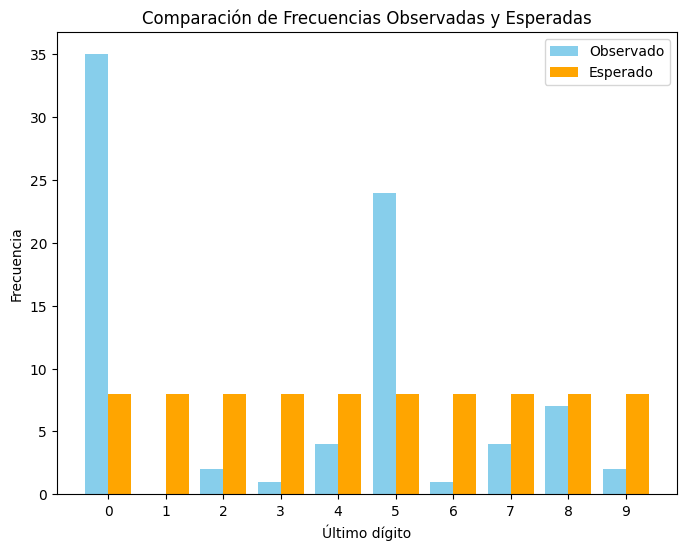

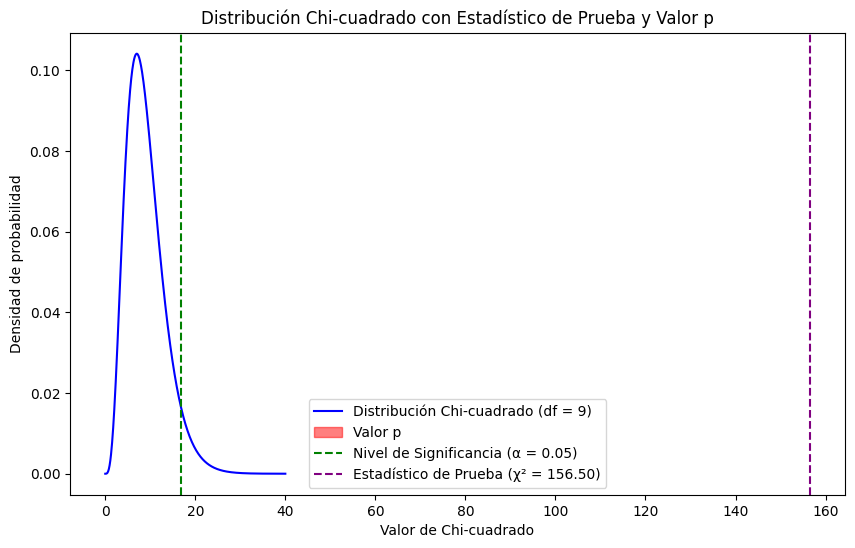

Estadístico Chi-cuadrado: 156.5000
Valor p: 0.0000
Valor crítico para α = 0.05: 16.9190
Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.


In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Nuevas frecuencias observadas
observed = np.array([35, 0, 2, 1, 4, 24, 1, 4, 7, 2])

# Frecuencias esperadas para una distribución uniforme
expected = np.full(10, 8)  # 80 muestras, así que 8 por dígito

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Gráfico de barras comparando las frecuencias observadas y esperadas
digits = np.arange(10)
plt.figure(figsize=(8, 6))
plt.bar(digits - 0.2, observed, width=0.4, label='Observado', color='skyblue')
plt.bar(digits + 0.2, expected, width=0.4, label='Esperado', color='orange')
plt.xlabel('Último dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias Observadas y Esperadas')
plt.xticks(digits)
plt.legend()
plt.show()

# Parámetros de la distribución chi-cuadrado
df = len(observed) - 1  # Grados de libertad (número de categorías - 1)

# Crear un rango de valores de chi-cuadrado
x = np.linspace(0, 40, 500)
chi2_dist = stats.chi2.pdf(x, df)

# Valor crítico para un nivel de significancia del 5%
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, chi2_dist, label=f'Distribución Chi-cuadrado (df = {df})', color='blue')

# Rellenar la región que representa el valor p (región de rechazo)
plt.fill_between(x, 0, chi2_dist, where=(x > chi2_stat), color='red', alpha=0.5, label='Valor p')

# Rellenar la región que representa el nivel de significancia
plt.axvline(chi2_critical, color='green', linestyle='--', label=f'Nivel de Significancia (α = {alpha})')
plt.axvline(chi2_stat, color='purple', linestyle='--', label=f'Estadístico de Prueba (χ² = {chi2_stat:.2f})')

# Etiquetas del gráfico
plt.title('Distribución Chi-cuadrado con Estadístico de Prueba y Valor p')
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar gráfico
plt.show()

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Valor crítico para α = {alpha}: {chi2_critical:.4f}")

# Interpretación del resultado
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los últimos dígitos parecen distribuidos uniformemente.")
else:
    print("Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.")


**Observaciones**
+ El estadístico de prueba es x2  = 156.500. El valor crítico es x2   16.919 
+ El estadístico de prueba y el valor crítico se muestran en la figura.

#### **Interpretación**
+ Existe suficiente evidencia para sustentar la aseveración de que los últimos dígitos no se presentan con la misma frecuencia relativa. 
+ Hay evidencia muy fuerte que sugiere que los pesos realmente no se midieron. 
+ Es razonable especular que se trata de valores reportados y no de mediciones reales.

___________________________________________________________________________________________________________________

## 3. Prueba para categorías igualmente probables
+ Las siguientes son las frecuencias observadas de tres categorías: 5, 5, 20. 
+ Suponga que queremos utilizar un nivel de significancia de 0.05 para probar la aseveración de que las tres categorías son igualmente probables.
+ a. ¿Cuál es la hipótesis nula?
+ b. ¿Cuál es la frecuencia esperada para cada una de las tres categorías?
+ c.  ¿Cuál es el valor del estadístico de prueba?
+ d. ¿Cuál es el valor crítico?
+ e.  ¿Qué concluye usted acerca de la aseveración dada?


[10 10 10] [ 5  5 20]


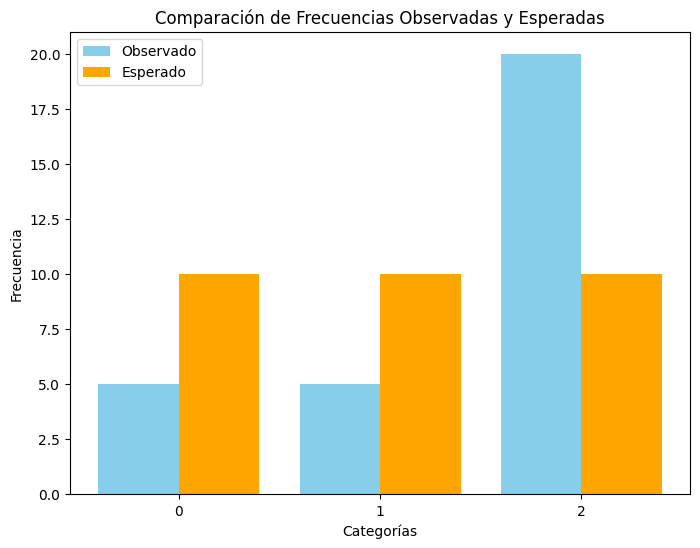

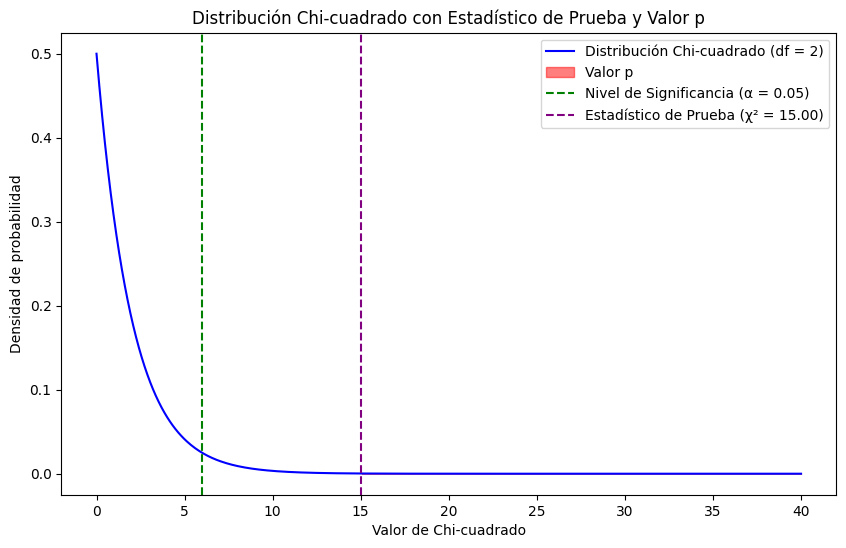

Estadístico Chi-cuadrado: 15.0000
Valor p: 0.0006
Valor crítico para α = 0.05: 5.9915
Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.


In [18]:
# Nuevas frecuencias observadas
observed = np.array([5, 5, 20])

# Frecuencias esperadas para una distribución uniforme
expected = np.full(3, 10)  # 30 muestras, así que 10 por dígito

print(expected, observed)

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Gráfico de barras comparando las frecuencias observadas y esperadas
digits = np.arange(3)
plt.figure(figsize=(8, 6))
plt.bar(digits - 0.2, observed, width=0.4, label='Observado', color='skyblue')
plt.bar(digits + 0.2, expected, width=0.4, label='Esperado', color='orange')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias Observadas y Esperadas')
plt.xticks(digits)
plt.legend()
plt.show()

# Parámetros de la distribución chi-cuadrado
df = len(observed) - 1  # Grados de libertad (número de categorías - 1)

# Crear un rango de valores de chi-cuadrado
x = np.linspace(0, 40, 500)
chi2_dist = stats.chi2.pdf(x, df)

# Valor crítico para un nivel de significancia del 5%
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, chi2_dist, label=f'Distribución Chi-cuadrado (df = {df})', color='blue')

# Rellenar la región que representa el valor p (región de rechazo)
plt.fill_between(x, 0, chi2_dist, where=(x > chi2_stat), color='red', alpha=0.5, label='Valor p')

# Rellenar la región que representa el nivel de significancia
plt.axvline(chi2_critical, color='green', linestyle='--', label=f'Nivel de Significancia (α = {alpha})')
plt.axvline(chi2_stat, color='purple', linestyle='--', label=f'Estadístico de Prueba (χ² = {chi2_stat:.2f})')

# Etiquetas del gráfico
plt.title('Distribución Chi-cuadrado con Estadístico de Prueba y Valor p')
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar gráfico
plt.show()

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Valor crítico para α = {alpha}: {chi2_critical:.4f}")

# Interpretación del resultado
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los últimos dígitos parecen distribuidos uniformemente.")
else:
    print("Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.")


________________________________________________________________________________________________________________________

## 4. Prueba para categorías con proporciones diferentes. 
+ Las siguientes son las frecuencias observadas para cuatro categorías: 5, 10, 10, 20. Suponga que queremos utilizar un nivel de significancia de 0.05 para probar la aseveración de que las cuatro categorías tienen proporciones de 0.20, 0.25, 0.25 y 0.30, respectivamente. 
+ a. ¿Cuál es la hipótesis nula? 
+ b. ¿Cuáles son las frecuencias esperadas para las cuatro categorías? 
+ c.  ¿Cuál es el valor del estadístico de prueba? 
+ d. ¿Cuál es el valor crítico? 
+ e.  ¿Qué concluye usted acerca de la aseveración dada?


+ a. Hipótesis nula (H₀):
+ La hipótesis nula establece que las proporciones observadas en las cuatro categorías siguen las proporciones teóricas dadas:

[ 9.25 11.25 11.25 13.25] [ 5 10 10 20]


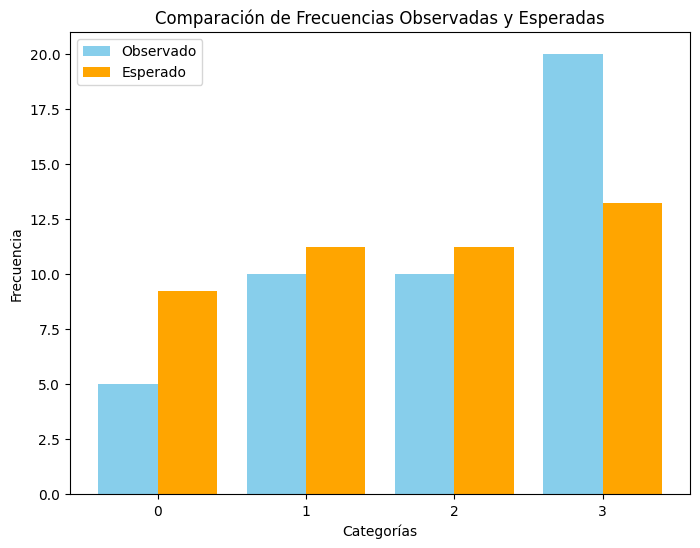

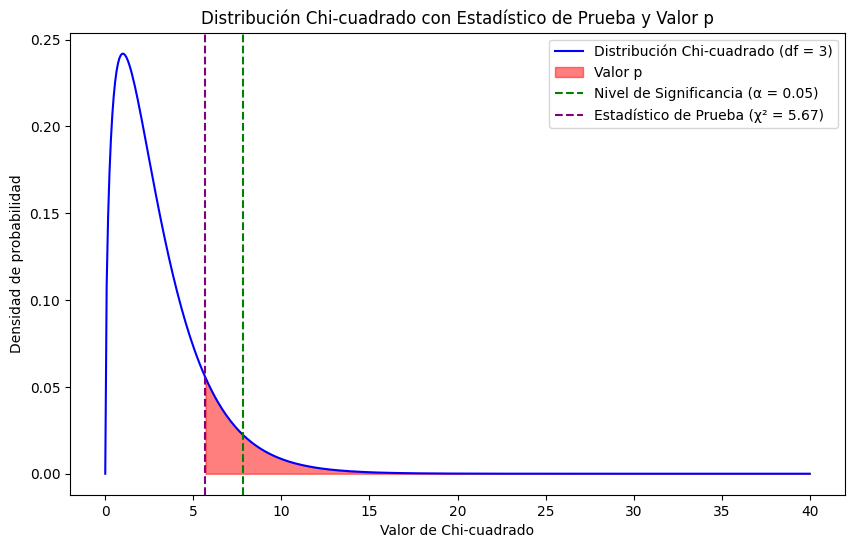

Estadístico Chi-cuadrado: 5.6692
Valor p: 0.1289
Valor crítico para α = 0.05: 7.8147
No se rechaza la hipótesis nula: Los últimos dígitos parecen distribuidos uniformemente.


In [20]:
# Nuevas frecuencias observadas
observed = np.array([5, 10, 10, 20])

# Frecuencias esperadas para una distribución uniforme
expected = np.array([9.25, 11.25, 11.25, 13.25])


print(expected, observed)

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Gráfico de barras comparando las frecuencias observadas y esperadas
digits = np.arange(4)
plt.figure(figsize=(8, 6))
plt.bar(digits - 0.2, observed, width=0.4, label='Observado', color='skyblue')
plt.bar(digits + 0.2, expected, width=0.4, label='Esperado', color='orange')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias Observadas y Esperadas')
plt.xticks(digits)
plt.legend()
plt.show()

# Parámetros de la distribución chi-cuadrado
df = len(observed) - 1  # Grados de libertad (número de categorías - 1)

# Crear un rango de valores de chi-cuadrado
x = np.linspace(0, 40, 500)
chi2_dist = stats.chi2.pdf(x, df)

# Valor crítico para un nivel de significancia del 5%
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, chi2_dist, label=f'Distribución Chi-cuadrado (df = {df})', color='blue')

# Rellenar la región que representa el valor p (región de rechazo)
plt.fill_between(x, 0, chi2_dist, where=(x > chi2_stat), color='red', alpha=0.5, label='Valor p')

# Rellenar la región que representa el nivel de significancia
plt.axvline(chi2_critical, color='green', linestyle='--', label=f'Nivel de Significancia (α = {alpha})')
plt.axvline(chi2_stat, color='purple', linestyle='--', label=f'Estadístico de Prueba (χ² = {chi2_stat:.2f})')

# Etiquetas del gráfico
plt.title('Distribución Chi-cuadrado con Estadístico de Prueba y Valor p')
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar gráfico
plt.show()

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Valor crítico para α = {alpha}: {chi2_critical:.4f}")

# Interpretación del resultado
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los últimos dígitos parecen distribuidos uniformemente.")
else:
    print("Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.")


__________________________________________________________________________________________________________________________________

## 5. Muertes por choques de automóviles. 
+ Se seleccionaron al azar muertes por choques de automóviles y los resultados se incluyen en la siguiente tabla (según datos del Insurance Institute for Highway Safety). 
+ Utilice un nivel de significancia de 0.05 para probar la aseveración de que las muertes por choques de automóviles ocurren con la misma frecuencia en los diferentes días de la semana. 
+ ¿Cómo se explicarían los resultados?  ¿Por qué parece haber un número excepcionalmente grande de muertes por choques de automóviles los sábados?
    + Día Dom Lun Mar Mié Jue Vie Sáb
    + Número de muertes 132 98 95 98 105 133 158

Estadístico de prueba Chi-cuadrado: 30.017
Valor p: 0.000
Valor crítico Chi-cuadrado (α=0.05): 12.592
Rechazamos la hipótesis nula. Las muertes no ocurren con la misma frecuencia en cada día.


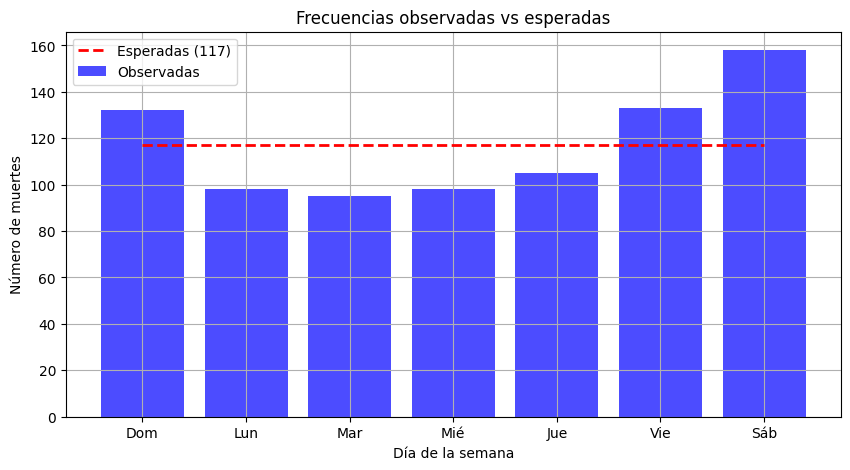

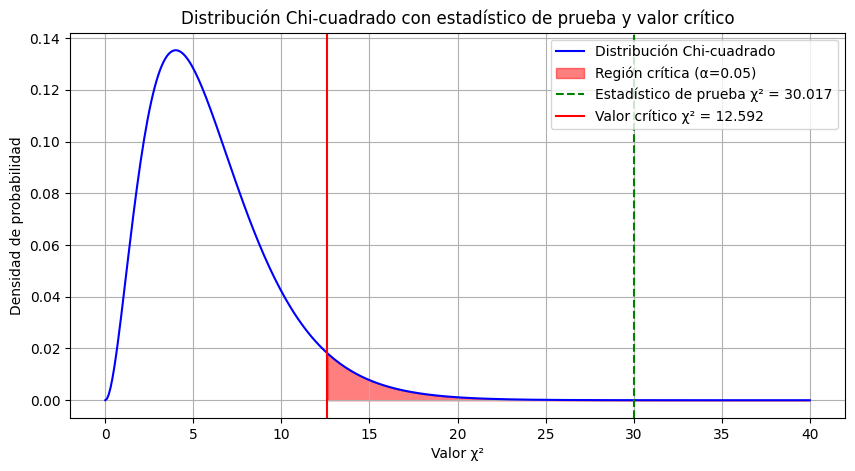

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Frecuencias observadas de muertes por choques de automóviles
observed = np.array([132, 98, 95, 98, 105, 133, 158])

# Total de muertes
total_deaths = np.sum(observed)

# Número de días de la semana
n_days = 7

# Frecuencia esperada si las muertes son igualmente probables
expected = np.full(n_days, total_deaths / n_days)

# Estadístico de prueba Chi-cuadrado
chi2_stat, p_val = stats.chisquare(observed, expected)

# Grados de libertad
df = n_days - 1

# Valor crítico para un nivel de significancia del 5% y df=6
alpha = 0.05
chi2_crit = stats.chi2.ppf(1 - alpha, df)

# Impresión de resultados
print(f"Estadístico de prueba Chi-cuadrado: {chi2_stat:.3f}")
print(f"Valor p: {p_val:.3f}")
print(f"Valor crítico Chi-cuadrado (α=0.05): {chi2_crit:.3f}")

# Comprobación de la hipótesis
if chi2_stat > chi2_crit:
    print("Rechazamos la hipótesis nula. Las muertes no ocurren con la misma frecuencia en cada día.")
else:
    print("No podemos rechazar la hipótesis nula. Las muertes ocurren con la misma frecuencia en cada día.")

# --------- Gráfico de frecuencias observadas vs esperadas ---------
plt.figure(figsize=(10, 5))
days = ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']

plt.bar(days, observed, alpha=0.7, label='Observadas', color='blue')
plt.plot(days, expected, 'r--', label='Esperadas (117)', linewidth=2)

plt.xlabel('Día de la semana')
plt.ylabel('Número de muertes')
plt.title('Frecuencias observadas vs esperadas')
plt.legend()
plt.grid(True)
plt.show()

# --------- Gráfico de Chi-cuadrado ---------
# Valores de Chi-cuadrado para diferentes niveles
chi2_values = np.linspace(0, 40, 400)
chi2_dist = stats.chi2.pdf(chi2_values, df)

plt.figure(figsize=(10, 5))
plt.plot(chi2_values, chi2_dist, label='Distribución Chi-cuadrado', color='blue')

# Rellenar la región crítica
plt.fill_between(chi2_values, 0, chi2_dist, where=(chi2_values >= chi2_crit), color='red', alpha=0.5, label='Región crítica (α=0.05)')

# Línea para el valor del estadístico de prueba
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Estadístico de prueba χ² = {chi2_stat:.3f}')

# Valor crítico
plt.axvline(chi2_crit, color='red', linestyle='-', label=f'Valor crítico χ² = {chi2_crit:.3f}')

plt.xlabel('Valor χ²')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Chi-cuadrado con estadístico de prueba y valor crítico')
plt.legend()
plt.grid(True)
plt.show()


_________________________________________________________________________________________________________________________